In [666]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [667]:
#Loading dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df["source"] = "train"
test_df["source"] = "test"
data = pd.concat([train_df, test_df],ignore_index=True)

In [668]:
#shape of datasets
print(train_df.shape,test_df.shape,data.shape)

(8523, 13) (5681, 12) (14204, 13)


# Data Understanding and Exploration

In [669]:
#First five rows of datest
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [670]:
#First five rows of datest
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [671]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [672]:
# Shape of dataset
data.shape

(14204, 13)

In [673]:
#Statistics of dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [674]:
#Checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [675]:
data['Item_Identifier'].value_counts()

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

In [676]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [677]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: count, Length: 13006, dtype: int64

In [678]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [679]:
data['Outlet_Identifier'].value_counts()   

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [680]:
data['Outlet_Establishment_Year'].value_counts()   

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

In [681]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [682]:
data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

In [683]:
 data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

# Data Preprocessing

#To impute "Item_Weight", we are filtering the data for each unique "Item_Identifier" and then assigning the mean value of that category to the one which is "NA"

In [684]:
UniqueItems = set(data.Item_Identifier)

In [685]:
for each in UniqueItems:
    data.loc[(data["Item_Identifier"]==str(each)) & (data["Item_Weight"].isnull()),"Item_Weight"] =data.loc[data["Item_Identifier"]==str(each),"Item_Weight"].mean()

Visibility can't be 0
hence imputing it

In [686]:
UniqueItems = set(data.Item_Identifier)
for each in UniqueItems:
    data.loc[(data["Item_Identifier"]==str(each)) & (data["Item_Visibility"]==0),"Item_Visibility"] = data.loc[(data["Item_Identifier"]==str(each)) & (data["Item_Visibility"]!=0),"Item_Visibility"].mean()

In [687]:
data["Item_Visibility"].describe()

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

In [688]:
#Filling Missing values for Outlet_Size
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [689]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [690]:
missing_values = data['Outlet_Size'].isnull()

In [691]:
missing_values

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [692]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [693]:
#Again checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [694]:
#standarizing the Item_Fat_Content Column
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [695]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

# Exploratory_Data_Analysis

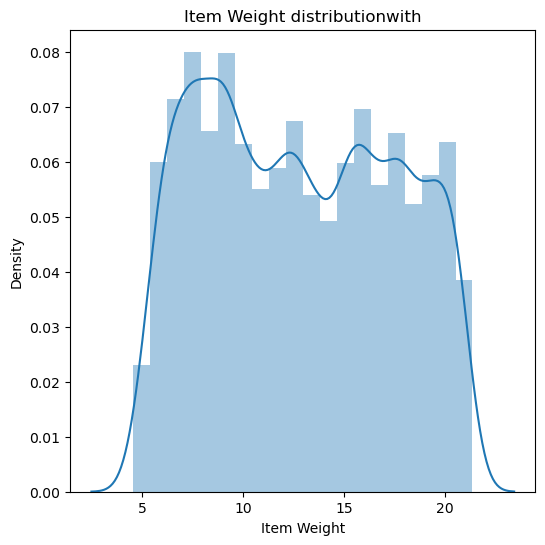

In [696]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'], bins=20)
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.title('Item Weight distributionwith')
plt.show()

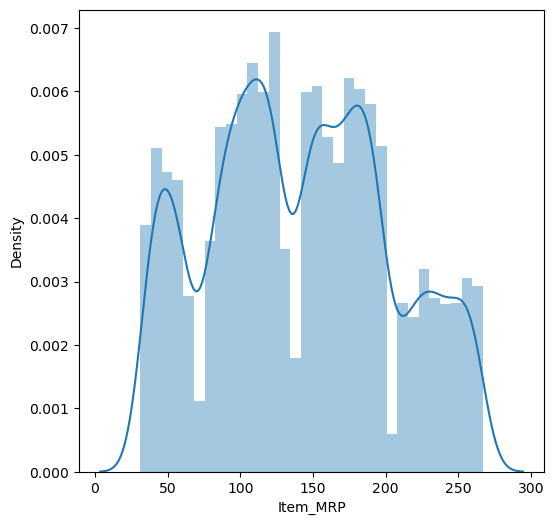

In [697]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.xlabel('Item_MRP')
plt.ylabel('Density')
plt.show()

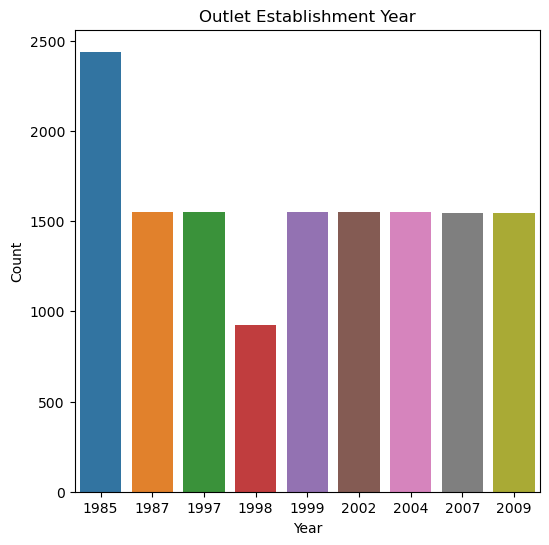

In [698]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Outlet Establishment Year')
plt.show()

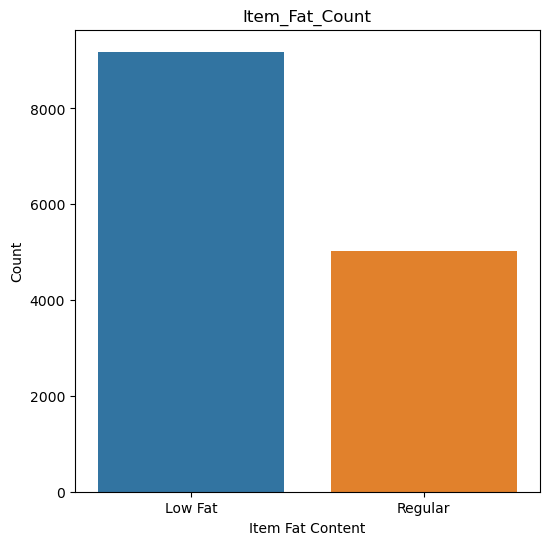

In [699]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.title('Item_Fat_Count')
plt.show()

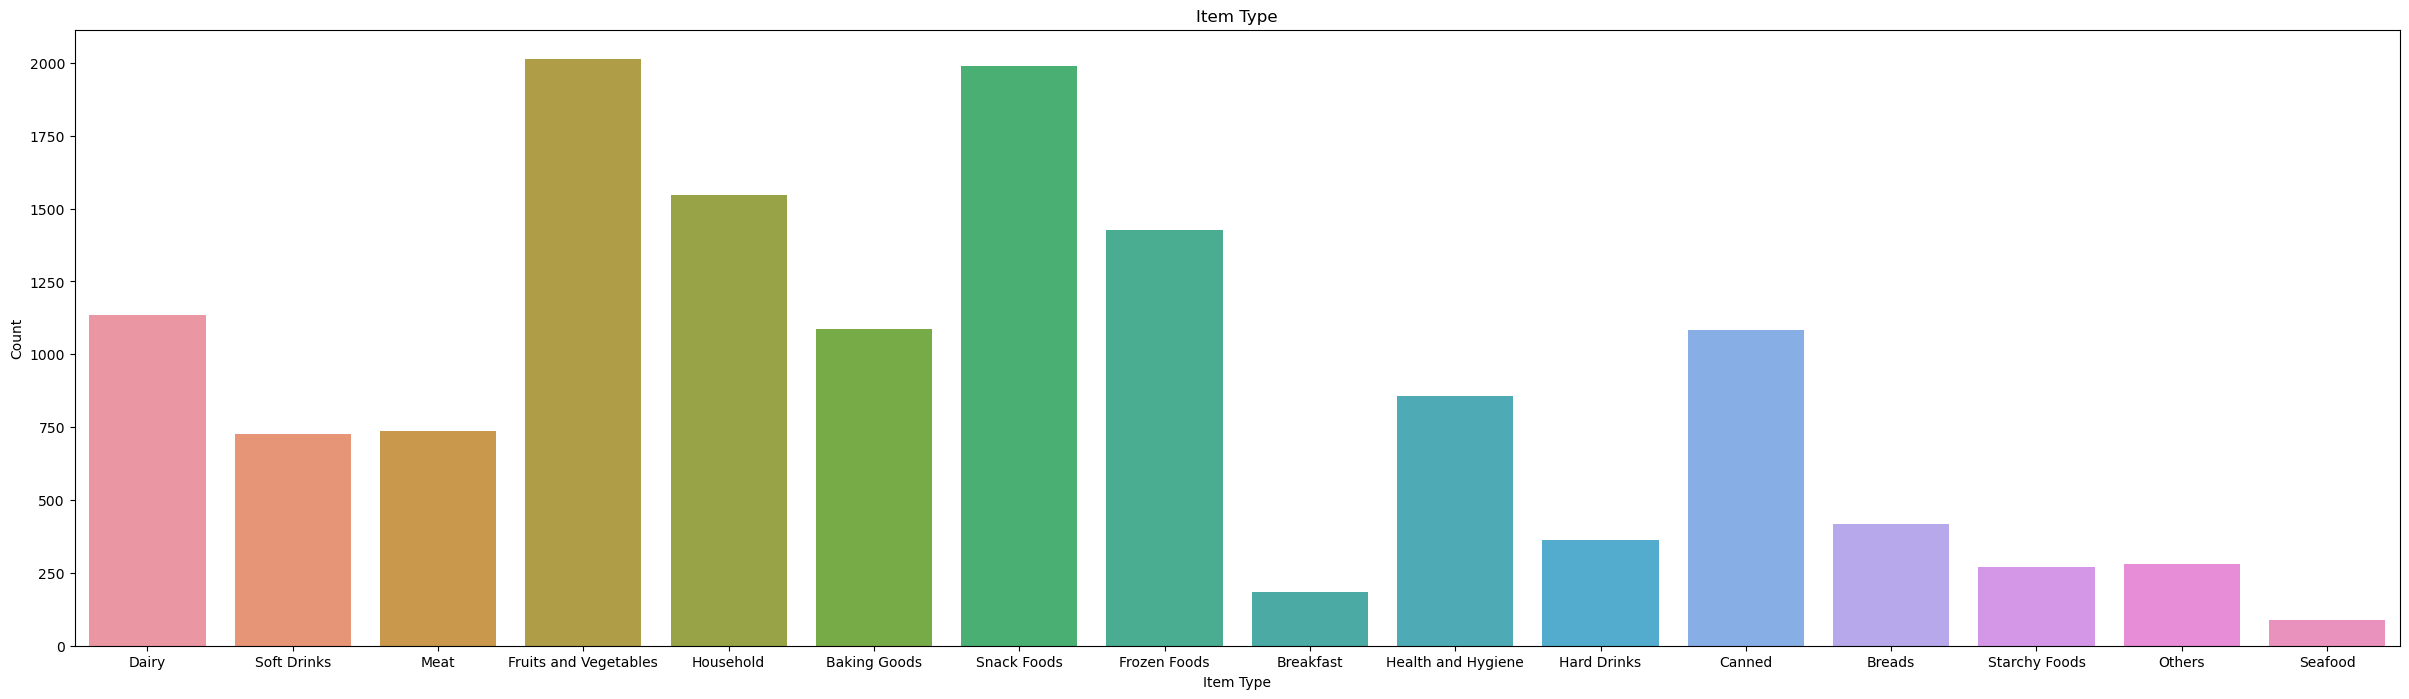

In [700]:
# Item_Type column
plt.figure(figsize=(30,8))
sns.countplot(x='Item_Type', data=data)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Item Type')
plt.show()

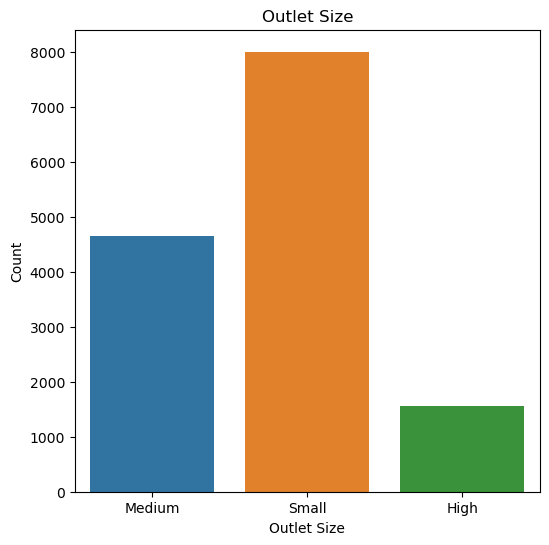

In [701]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=data)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size')
plt.show()

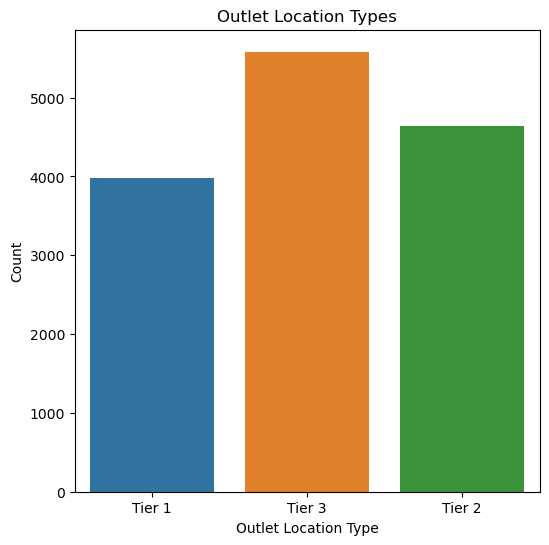

In [702]:
# Outlet_Location_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=data)
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Types')
plt.show()

In [703]:
#Corelation
data.corr(numeric_only=True)['Item_Outlet_Sales'].sort_values(ascending=False).reset_index()

,index,Item_Outlet_Sales
0,Item_Outlet_Sales,1.000000
1,Item_MRP,0.567574
2,Item_Weight,0.013261
3,Outlet_Establishment_Year,-0.049135
4,Item_Visibility,-0.127014


In [704]:
#dropping these column as they have less corelation with Item_Outlet_Sales
data.drop(columns=['Item_Visibility','Outlet_Establishment_Year'],inplace=True)

In [705]:
# Handling Categorical Variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [706]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [707]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,0,4,249.8092,9,1,0,1,3735.1380,train
1,8,5.92,1,14,48.2692,3,1,2,2,443.4228,train
2,662,17.50,0,10,141.6180,9,1,0,1,2097.2700,train
3,1121,19.20,1,6,182.0950,0,2,2,0,732.3800,train
4,1297,8.93,0,9,53.8614,1,0,2,1,994.7052,train


In [708]:
# Separate back into train and test
train = data[data["source"] == "train"].drop(columns=["source"])
test = data[data["source"] == "test"].drop(columns=["source", "Item_Outlet_Sales"])
print(test.shape)

(5681, 9)


In [709]:
# Define features and target
X = train.drop(columns=["Item_Outlet_Sales"])
y = train["Item_Outlet_Sales"]
print(X.shape,y.shape)

(8523, 9) (8523,)


In [710]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [711]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5966, 9) (2557, 9) (5966,) (2557,)


# Model Evaluation

In [713]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [714]:
# Linera Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test,y_pred )
print(f"Root Mean square Errorr: {rmse}")
print('R2 score',r2_score(y_test,y_pred))


Root Mean square Errorr: 1276719.9757227732
R2 score 0.5441903155965314


In [715]:
# AdaBoost Regressor
model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmae = mean_squared_error(y_test, y_pred)
print(f"Root Mean square Error: {rmse}")
print('R2 score',r2_score(y_test,y_pred))

Root Mean square Error: 1276719.9757227732
R2 score 0.421074581233278


In [716]:
# XgBoost Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"Root Mean square Error: {rmse}")
print('R2 score',r2_score(y_test,y_pred))

y_sales_pred=model.predict(test)
y_sales_pred


Root Mean square Error: 1134327.0536511287
R2 score 0.595026892218606


array([1650.08881997, 1365.53627806,  758.60435025, ..., 1920.73296711,
       3532.6382203 , 1235.91118932])

In [717]:
# Random Forest Regression
model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"Root Mean square Error: {rmse}")
print('R2 score',r2_score(y_test,y_pred))



Root Mean square Error: 1265912.0244820411
R2 score 0.5480489290260717


In [718]:
# Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"Root Mean square Error: {rmse}")
print('R2 score',r2_score(y_test,y_pred))

Root Mean square Error: 2241417.8535145554
R2 score 0.19977756763115573


In [719]:
test_predictions=pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales':y_sales_pred},
 columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [720]:
test_predictions.to_csv("sales_predictionsfile.csv", index=False)